# Data Analysis Notebook

This notebook provides an exploratory analysis of the real estate sales dataset. Key objectives include examining the distribution of target audiences across different months, uncovering data patterns, and supporting further machine learning work.


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('../data/data.xlsx', sheet_name='Данные')

print("Data shape:", df.shape)
print(df.info())

Data shape: (13, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Время               13 non-null     datetime64[ns]
 1   ЦА 1                13 non-null     float64       
 2   ЦА 2                13 non-null     float64       
 3   ЦА 3                13 non-null     float64       
 4   ЦА 4                13 non-null     float64       
 5   Параметр квартир 1  13 non-null     float64       
 6   Параметр квартир 2  13 non-null     float64       
 7   Внешний фактор 1    13 non-null     int64         
 8   Внешний фактор 2    13 non-null     int64         
 9   Внешний фактор 3    13 non-null     int64         
 10  Внешний фактор 4    13 non-null     float64       
 11  Студии              13 non-null     int64         
 12  1 комн              13 non-null     int64         
 13  2 комн              13 non-null

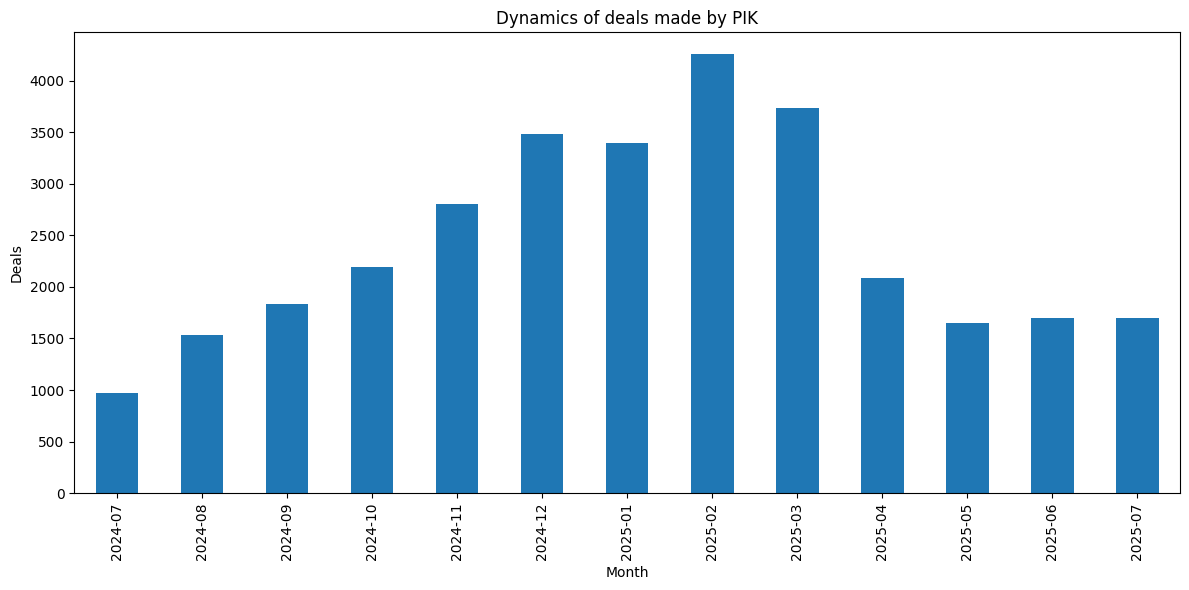

In [56]:
df['Месяц'] = pd.to_datetime(df['Время']).dt.to_period('M')

deals_monthly = df.groupby('Месяц')['Целевые сделки'].sum()

deals_monthly.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Dynamics of deals made by PIK')
plt.xlabel('Month')
plt.ylabel('Deals')
plt.tight_layout()
plt.show()

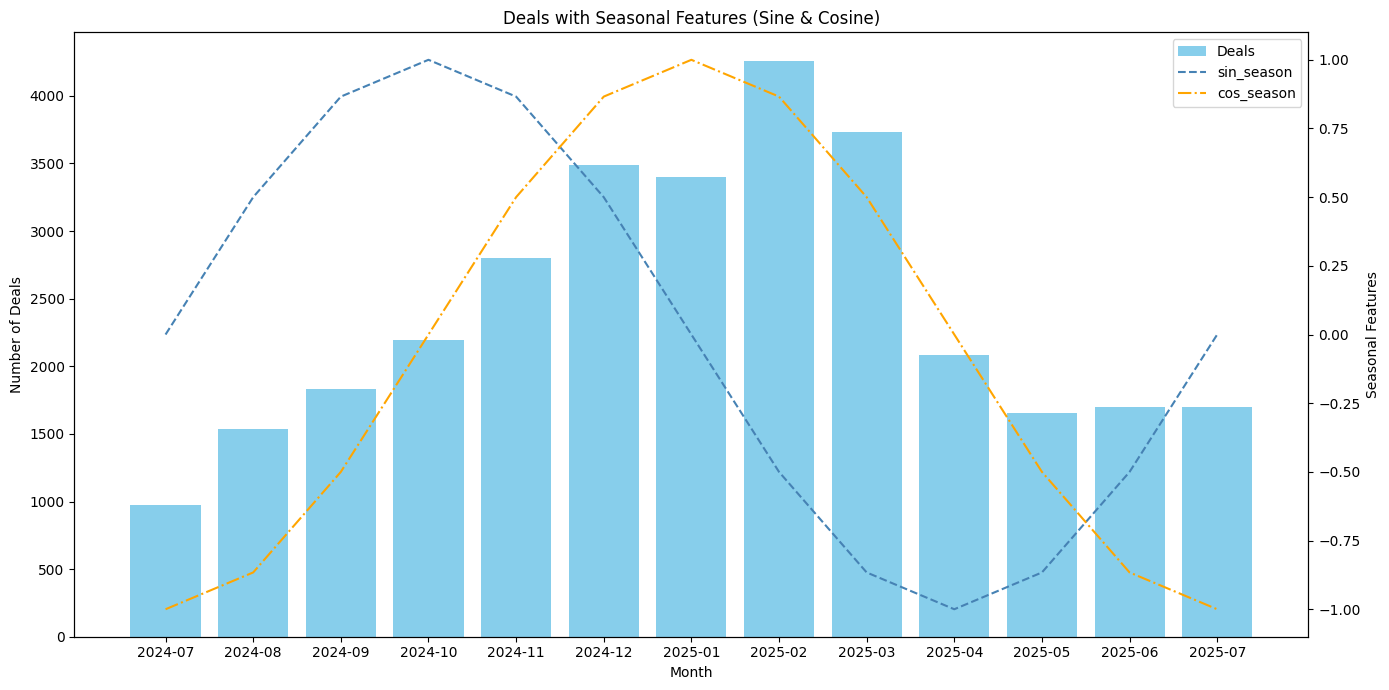

In [57]:
df['Месяц_str'] = df['Месяц'].astype(str)

fig, ax1 = plt.subplots(figsize=(14,7))

period = 12
df = df.reset_index(drop=True)
df['month_index'] = np.arange(len(df))
df['sin_season'] = np.sin(2 * np.pi * df['month_index'] / period)
df['cos_season'] = -np.cos(2 * np.pi * df['month_index'] / period)

ax1.bar(df['Месяц_str'], df['Целевые сделки'], color='skyblue', label='Deals')
ax1.set_ylabel("Number of Deals")
ax1.set_xlabel("Month")

ax2 = ax1.twinx()
ax2.plot(df['Месяц_str'], df['sin_season'], color='steelblue', linestyle='--', label='sin_season')
ax2.plot(df['Месяц_str'], df['cos_season'], color='orange', linestyle='-.', label='cos_season')
ax2.set_ylabel("Seasonal Features")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title("Deals with Seasonal Features (Sine & Cosine)")
plt.tight_layout()
plt.show()

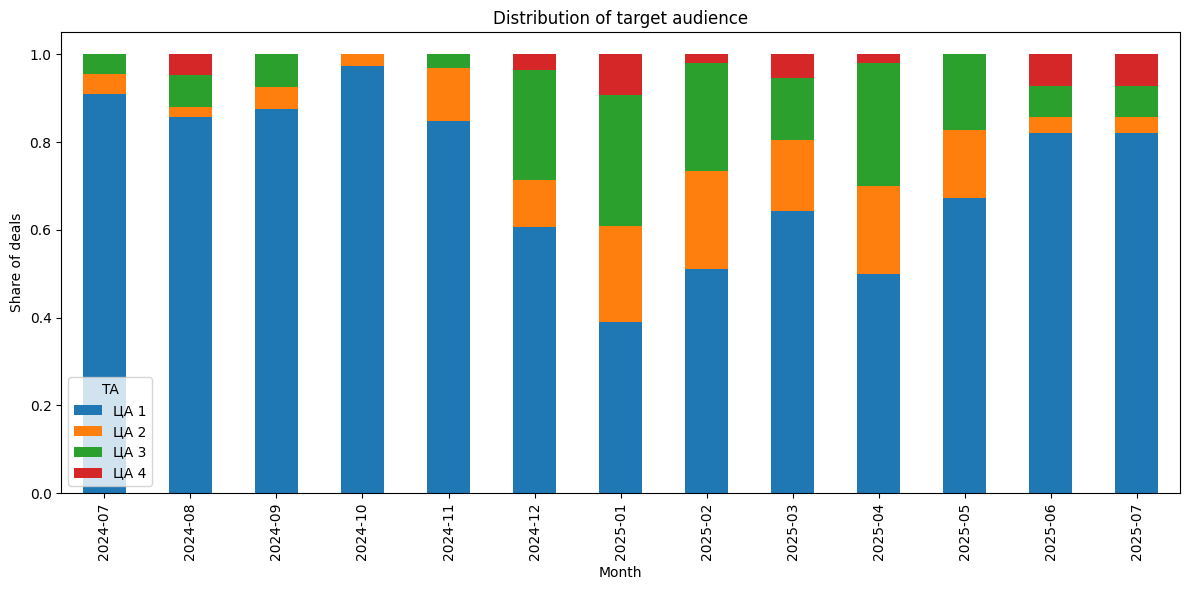

In [58]:
ca_cols = [col for col in df.columns if col.startswith('ЦА ')]

ca_monthly = df.groupby('Месяц')[ca_cols].sum()

ca_monthly.plot(kind='bar', figsize=(12,6), stacked=True)
plt.title('Distribution of target audience')
plt.xlabel('Month')
plt.ylabel('Share of deals')
plt.legend(title='TA')
plt.tight_layout()
plt.show()

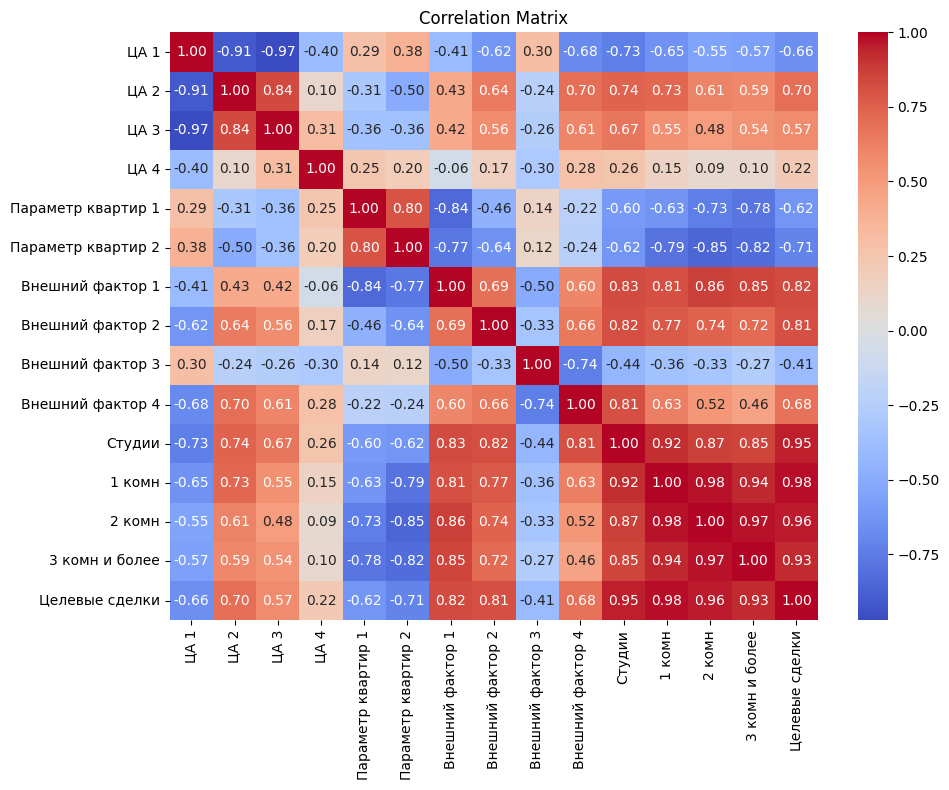

In [59]:
exclude_cols = ['month_index', 'sin_season', 'cos_season']
cols_to_corr = [col for col in df.select_dtypes(include=[np.number]).columns if col not in exclude_cols]
corr = df[cols_to_corr].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Key Insights from Data Analysis

The exploratory analysis provided a deeper understanding of the dataset and the relationships between its features.

1. The peak number of transactions occurred in January and February. The seasonal trend suggested by the charts was later confirmed through further analysis.
2. TA 1 (Target Audience 1) consistently dominated deal shares across all months. Notably, the proportion of other segments increases significantly in January and February, which reveals important patterns in consumer behavior and the underlying reasons for purchases during these months.
3. The correlation matrix highlighted that the strongest correlations are observed between the different apartment types. This is logical, as the proportion of apartment sizes remains relatively stable on average.

Once the predictive model is built, it will be possible to conduct a deeper analysis of how each factor impacts model outcomes.
